### Gradient Descent and Back-Propagation Tutorial

#### 1. **Introduction**

Gradient Descent and Backpropagation are fundamental concepts in machine learning and neural networks. They are used to train models by optimizing the parameters to minimize a loss function. This tutorial will guide you through the high-level intuitions, detailed explanations, examples, and mathematical implementations of these concepts.

### 2. **High-Level Intuition**

#### **Gradient Descent**
- **Purpose**: Gradient Descent is an optimization algorithm used to minimize the loss function by iteratively moving towards the direction of the steepest descent.
- **Analogy**: Imagine you are at the top of a hill (loss function) and want to reach the bottom (minimum loss). Gradient Descent helps you decide which direction to go in order to get down the hill as quickly as possible.

#### **Backpropagation**
- **Purpose**: Backpropagation is an algorithm used to compute the gradient of the loss function with respect to each weight by the chain rule, essential for applying gradient descent in neural networks.
- **Analogy**: Think of Backpropagation as a method to trace back the error from the output layer to each neuron, allowing you to understand how much each weight in the network contributed to the error.

### 3. **Detailed Explanation**

#### **Gradient Descent**

Gradient Descent is based on the idea of updating model parameters (weights) in the opposite direction of the gradient of the loss function with respect to the parameters. This update is repeated iteratively until the model converges to a minimum.

1. **Loss Function**: A function that measures how well your model's predictions match the actual data. The goal is to minimize this function.

2. **Gradient**: The gradient of the loss function with respect to the parameters gives the direction in which the loss increases the most. Therefore, moving in the opposite direction reduces the loss.

3. **Learning Rate**: A hyperparameter that determines the size of the steps taken towards the minimum. Too large a learning rate can overshoot the minimum, while too small a learning rate can make convergence slow.

4. **Convergence**: The process of reaching the minimum of the loss function. Convergence occurs when further updates result in negligible changes in the loss.

#### **Backpropagation**

Backpropagation allows the network to adjust the weights in order to reduce the output error. It uses the chain rule to propagate the error backward through the network.

1. **Forward Pass**: Inputs are fed into the network, passing through hidden layers, and resulting in an output.

2. **Calculate Loss**: The difference between the actual output and the predicted output is computed using the loss function.

3. **Backward Pass**: The error is propagated backward from the output layer to the input layer, calculating the gradient of the loss with respect to each weight.

4. **Update Weights**: Gradients are used to update the weights in the direction that reduces the loss, applying the updates through Gradient Descent.

### 4. **Examples**

Let's implement Gradient Descent and Backpropagation using a simple neural network in Python.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Simple Neural Network with one input, one hidden layer, and one output

# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# Loss function (Mean Squared Error)
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Initialize weights
input_size = 2
hidden_size = 2
output_size = 1

np.random.seed(42)
weights_input_hidden = np.random.rand(input_size, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)

# Training data (XOR problem)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

learning_rate = 0.1
epochs = 10000

# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    y_pred = sigmoid(output_layer_input)
    
    # Calculate loss
    loss = mse_loss(y, y_pred)
    
    # Backpropagation
    output_error = y - y_pred
    output_delta = output_error * sigmoid_derivative(y_pred)
    
    hidden_error = output_delta.dot(weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)
    
    # Update weights
    weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
    weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
    
    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Final predictions
print("Final predictions:")
print(y_pred)

Epoch 0, Loss: 0.2520513692725072
Epoch 1000, Loss: 0.24957825555837285
Epoch 2000, Loss: 0.24673449720306548
Epoch 3000, Loss: 0.22832829385002756
Epoch 4000, Loss: 0.19198566197278602
Epoch 5000, Loss: 0.15842442683707977
Epoch 6000, Loss: 0.1324054314829405
Epoch 7000, Loss: 0.11242671428372651
Epoch 8000, Loss: 0.09689125587770052
Epoch 9000, Loss: 0.08460830116601278
Final predictions:
[[0.20369158]
 [0.73603066]
 [0.73604444]
 [0.34370702]]


### 5. **Mathematics and Chain Rule**

#### **Mathematics of Gradient Descent**

Consider a simple linear regression model, where the relationship between the input $x$ and output $y$ is modeled as:

$$ y = wx + b $$

Here:
- $w$ is the weight or slope of the line.
- $b$ is the bias or y-intercept of the line.
- $x$ is the input feature.
- $y$ is the predicted output.

The goal is to find the values of $w$ and $b$ that minimize the error between the predicted values and the actual values. We quantify this error using the **mean squared error (MSE)** as our loss function, which measures the average squared difference between the actual and predicted values:

$$ L(w, b) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - (wx_i + b))^2 $$

Where:
- $L(w, b)$ is the loss function.
- $n$ is the number of data points.
- $y_i$ is the actual output for the $i$-th data point.
- $x_i$ is the input feature for the $i$-th data point.
- $(wx_i + b)$ is the predicted output for the $i$-th data point.

To minimize this loss function, we use gradient descent, which involves calculating the gradient (partial derivatives) of the loss function with respect to the parameters $w$ and $b$. The gradients tell us the direction and magnitude of the steepest ascent, so we update our parameters in the opposite direction to minimize the loss.

The partial derivative of the loss function with respect to $w$ is:

$$ \frac{\partial L}{\partial w} = -\frac{1}{n} \sum_{i=1}^{n} (y_i - (wx_i + b))x_i $$

This expression gives us the average gradient of the loss function concerning $w$ over all data points.

The partial derivative of the loss function with respect to $b$ is:

$$ \frac{\partial L}{\partial b} = -\frac{1}{n} \sum_{i=1}^{n} (y_i - (wx_i + b)) $$

This expression gives us the average gradient of the loss function concerning $b$ over all data points.

These gradients are used in the update rules for gradient descent, where we adjust $w$ and $b$ iteratively by subtracting a fraction of the gradient, scaled by the learning rate $\alpha$:

$$ w := w - \alpha \frac{\partial L}{\partial w} $$
$$ b := b - \alpha \frac{\partial L}{\partial b} $$

Where:
- $\alpha$ is the learning rate, a hyperparameter that controls the step size of the updates.

#### **Backpropagation and the Chain Rule: Composing Functions in Neural Networks**

In neural networks, the output of each layer is the result of a composition of functions. Specifically, each layer takes the output of the previous layer, applies a linear transformation (using weights and biases), and then passes the result through a nonlinear activation function. This process is repeated across multiple layers, effectively composing a series of functions to produce the final output.

To understand this, consider a very simple neural network with just two layers. Let's denote the input by $x$, the output of the first layer by $g(x)$, and the output of the second layer by $f(g(x))$. Here, $g(x)$ might represent the linear transformation and activation function applied by the first layer, while $f(g(x))$ is the operation performed by the second layer.

Now, suppose we want to calculate the derivative of the output with respect to the input, $\frac{df(g(x))}{dx}$. According to the chain rule, which is a fundamental principle in calculus for differentiating compositions of functions, we have:

$$ \frac{df(g(x))}{dx} = \frac{df(g)}{dg} \cdot \frac{dg(x)}{dx} $$

This tells us that to compute the derivative of the composition $f(g(x))$, we first compute the derivative of $f$ with respect to its input $g$, and then multiply it by the derivative of $g$ with respect to $x$. This is exactly how gradients are propagated through a neural network.

#### **Applying the Chain Rule in Backpropagation**

In a neural network, the loss function $L$ depends on the final output of the network, which is the result of a series of composed functions representing the layers of the network. To minimize this loss, we need to adjust the weights in each layer, which requires calculating the gradient of the loss with respect to each weight.

Backpropagation is the process used to efficiently compute these gradients. It works by applying the chain rule iteratively to propagate the error backward through the network, starting from the output layer and moving toward the input layer.

For a neuron $j$ in layer $l$, the error term $\delta_j^l$ quantifies how much this neuron contributes to the overall error in the network. It is calculated using the chain rule as:

$$ \delta_j^l = \frac{\partial L}{\partial z_j^l} = \sum_k \delta_k^{l+1} w_{jk}^{l+1} \cdot \sigma'(z_j^l) $$

Where:
- $\delta_j^l$ is the error term for neuron $j$ in layer $l$. It represents the gradient of the loss function with respect to the neuron's weighted input $z_j^l$.
- $z_j^l$ is the weighted input to neuron $j$ in layer $l$, which is the result of a linear combination of the outputs from the previous layer.
- $w_{jk}^{l+1}$ is the weight connecting neuron $j$ in layer $l$ to neuron $k$ in layer $l+1$.
- $\sigma'(z_j^l)$ is the derivative of the activation function $\sigma$ with respect to the weighted input $z_j^l$.

In this expression:
- $\delta_k^{l+1}$ represents the error term for the neurons in the next layer ($l+1$). 
- The product $w_{jk}^{l+1} \cdot \sigma'(z_j^l)$ allows the error to be backpropagated from layer $l+1$ to layer $l$, adjusting the weights in a way that minimizes the loss.

By repeatedly applying this formula, we propagate the error backward through the entire network. This allows us to compute the gradient of the loss function with respect to each weight, enabling us to update the weights using gradient descent.

The result is that the network gradually adjusts its weights, layer by layer, to reduce the loss and improve its performance on the training data. This process is at the core of how neural networks learn and optimize their parameters during training.

### 6. **Plotting the Loss Function Surface**

To better understand how gradient descent works, we can visualize the loss function as a 3D surface. The surface represents the loss as a function of the parameters (e.g., $w$ and $b$). Gradient descent iteratively moves down this surface towards the minimum, which corresponds to the optimal values of the parameters that minimize the loss.

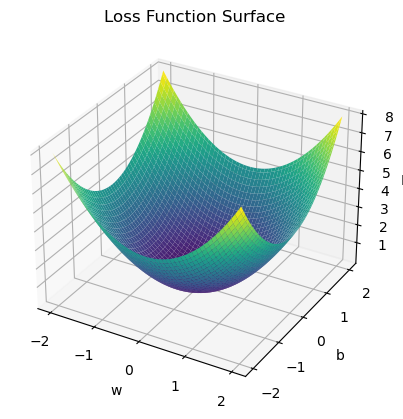

In [80]:
from mpl_toolkits.mplot3d import Axes3D

# Loss function surface example
def loss_function_surface(x, y):
    return x**2 + y**2

x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = loss_function_surface(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('Loss Function Surface')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
plt.show()

### 7. **Stochastic Gradient Descent (SGD)**

#### **Intuition**
- **Purpose**: SGD is a variant of Gradient Descent where the gradient is calculated using a single data point or a small batch, instead of the entire dataset.
- **Analogy**: Imagine taking many small, noisy steps down the hill, instead of carefully planned large steps.

#### **Detailed Explanation**
- **Updates**: In each iteration, only one data point (or a small batch) is used to calculate the gradient and update the weights.
- **Convergence**: SGD tends to converge faster than batch gradient descent but with more noise in the updates.

#### **Example**

In [8]:
import numpy as np

# Example dimensions (these should be set according to your data and model architecture)
input_size = 100  # Number of features in X
hidden_size = 10  # Number of neurons in the hidden layer
output_size = 1   # Number of output neurons

# Initialize weights with correct dimensions
weights_input_hidden = np.random.rand(input_size, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Mean squared error loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Dummy data for X and y
X = np.random.rand(10, input_size)  # 10 samples, 100 features
y = np.random.rand(10, output_size)  # 10 samples, 1 output

# Hyperparameters
learning_rate = 0.01
epochs = 10000

# Implementing Stochastic Gradient Descent
for epoch in range(epochs):
    for i in range(len(X)):
        # Forward pass
        hidden_layer_input = np.dot(X[i:i+1], weights_input_hidden)
        hidden_layer_output = sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
        y_pred = sigmoid(output_layer_input)
        
        # Calculate loss
        loss = mse_loss(y[i:i+1], y_pred)
        
        # Backpropagation
        output_error = y[i:i+1] - y_pred
        output_delta = output_error * sigmoid_derivative(y_pred)
        
        hidden_error = output_delta.dot(weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)
        
        # Update weights
        weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
        weights_input_hidden += X[i:i+1].T.dot(hidden_delta) * learning_rate

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Final predictions
print("Final predictions (SGD):")
print(y_pred)


Epoch 0, Loss: 0.544069522312575
Epoch 1000, Loss: 0.07747749900760502
Epoch 2000, Loss: 0.06388454168720185
Epoch 3000, Loss: 0.06388454168720185
Epoch 4000, Loss: 0.06388454168720185
Epoch 5000, Loss: 0.06388454168720185
Epoch 6000, Loss: 0.06388454168720185
Epoch 7000, Loss: 0.06388454168720185
Epoch 8000, Loss: 0.06388454168720185
Epoch 9000, Loss: 0.06388454168720185
Final predictions (SGD):
[[0.51291171]]


### 8. **Variants of Gradient Descent**

- **Mini-Batch Gradient Descent**: A compromise between batch and stochastic gradient descent, where a small batch of data is used for each update.
- **Momentum**: Adds a fraction of the previous update to the current update to accelerate convergence.
- **Nesterov Accelerated Gradient (NAG)**: A variant of momentum that anticipates the direction of the next update.
- **Adam**: Combines the advantages of both RMSprop and Momentum, adjusting learning rates individually for each parameter.
- **Binary Search Gradient Descent**: Uses binary search to iteratively select the optimal step size that minimizes the loss, leading to more precise convergence.

### 9. **Vanishing and Exploding Gradients**

- **Vanishing Gradient Problem**: In deep networks, gradients can become very small, slowing down learning. This is particularly problematic with activation functions like sigmoid or tanh.
- **Exploding Gradient Problem**: Gradients can become excessively large, causing weights to grow uncontrollably, often occurring in recurrent neural networks (RNNs).

### 10. **Activation Functions**

- **Sigmoid**: $\sigma(x) = \frac{1}{1 + e^{-x}}$, outputs values between 0 and 1, but can cause vanishing gradients.
- **Tanh**: $tanh(x) = \frac{2}{1 + e^{-2x}} - 1$, outputs values between -1 and 1, but also suffers from vanishing gradients.
- **ReLU**: $ReLU(x) = \max(0, x)$, commonly used due to its simplicity and reduced likelihood of vanishing gradients.
- **Leaky ReLU**: Allows a small gradient when the unit is not active, helping to mitigate the dying ReLU problem.

### 11. **Implementation and Details**

The implementation provided above demonstrates the basic workings of Gradient Descent, Backpropagation, and SGD with a simple neural network. For more complex networks, these principles scale up but the underlying mechanics remain the same.

### 12. **Conclusion**

Understanding Gradient Descent and Backpropagation is crucial for training neural networks effectively. By mastering these concepts, along with their variants and challenges like vanishing gradients, you can build and optimize complex models that perform well on real-world tasks.

## Visualizing various gradient descent methods

Certainly! Below, I'll guide you through plotting a 3D loss function in 2D using contour lines (topographic lines), and then we'll visualize the paths taken by different types of gradient descent (Batch Gradient Descent, Stochastic Gradient Descent, and Mini-Batch Gradient Descent) as they move down the loss surface.

### 1. **Define the Loss Function**

We'll use a simple quadratic loss function as an example:

$$ f(w_1, w_2) = w_1^2 + w_2^2 $$

This function has a single global minimum at $(w_1, w_2) = (0, 0)$.

### 2. **Generate the Contour Plot**

Let's create a contour plot of this loss function, which represents the 3D surface in 2D.

### 3. **Simulate Gradient Descent Paths**

We'll simulate the paths taken by Batch Gradient Descent, Stochastic Gradient Descent, and Mini-Batch Gradient Descent. We'll then plot these paths on the contour plot.

### Simulation (Run main() below many times to see various gradients and paths taken)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def loss_function(w1, w2, params):
    """
    Generate a highly randomized and textured loss function.
    
    Parameters:
    - w1, w2: Coordinates in the parameter space.
    - params: Dictionary containing configuration for randomness and coefficients.
    
    Returns:
    - A scalar value representing the loss at the given coordinates.
    """
    base_loss = w1**2 + w2**2  # Base quadratic loss
    
    # Add multiple randomized components (sine, cosine, and Gaussian wells)
    component_1 = params['sine_coeff_1'] * np.sin(params['sine_freq_1'] * w1 + params['sine_phase_1']) * np.cos(params['sine_freq_1'] * w2 + params['sine_phase_2'])
    component_2 = params['sine_coeff_2'] * np.cos(params['sine_freq_2'] * w1 + params['sine_phase_3']) * np.sin(params['sine_freq_2'] * w2 + params['sine_phase_4'])
    component_3 = params['exp_coeff'] * np.exp(-((w1 - params['exp_shift_w1'])**2 + (w2 - params['exp_shift_w2'])**2) / params['exp_spread'])
    
    # Combine all components with randomness in coefficients
    random_component = params['random_scale'] * (component_1 + component_2 + component_3)
    
    return base_loss + random_component

def gradient(w1, w2, params):
    """
    Calculate the gradient of the highly randomized loss function.
    
    Parameters:
    - w1, w2: Coordinates in the parameter space.
    - params: Dictionary containing configuration for randomness and coefficients.
    
    Returns:
    - A numpy array representing the gradient vector at the given coordinates.
    """
    grad_w1 = (2 * w1 +
               params['sine_coeff_1'] * params['sine_freq_1'] * np.cos(params['sine_freq_1'] * w1 + params['sine_phase_1']) * np.cos(params['sine_freq_1'] * w2 + params['sine_phase_2']) -
               params['exp_coeff'] * 2 * (w1 - params['exp_shift_w1']) * np.exp(-((w1 - params['exp_shift_w1'])**2 + (w2 - params['exp_shift_w2'])**2) / params['exp_spread']))
    
    grad_w2 = (2 * w2 +
               params['sine_coeff_2'] * params['sine_freq_2'] * np.sin(params['sine_freq_2'] * w1 + params['sine_phase_3']) * np.sin(params['sine_freq_2'] * w2 + params['sine_phase_4']) -
               params['exp_coeff'] * 2 * (w2 - params['exp_shift_w2']) * np.exp(-((w1 - params['exp_shift_w1'])**2 + (w2 - params['exp_shift_w2'])**2) / params['exp_spread']))
    
    # Add significant random noise to the gradient
    noise = np.random.normal(scale=params['noise_scale'], size=(2,))
    return np.array([grad_w1, grad_w2]) + noise

def plot_contour(W1, W2, Z, params):
    """
    Plot the contour map of the loss function.
    
    Parameters:
    - W1, W2: Meshgrid of coordinates in the parameter space.
    - Z: The calculated loss values over the grid.
    - params: Dictionary containing plotting parameters.
    
    Returns:
    - None
    """
    plt.figure(figsize=params['figsize'])
    contours = plt.contour(W1, W2, Z, levels=np.logspace(-1, 1, params['contour_levels']), cmap='viridis')
    plt.clabel(contours, inline=True, fontsize=params['label_fontsize'])
    plt.title('Contour Plot of Highly Randomized Loss Function')
    plt.xlabel('w1')
    plt.ylabel('w2')

def plot_descent_path(grad_desc_func, w_init, color, marker, label, learning_rate, params, return_losses=False):
    """
    Plot the path taken by the gradient descent method.
    
    Parameters:
    - grad_desc_func: The gradient descent function to simulate.
    - w_init: Initial point in the parameter space.
    - color: Color of the path plot.
    - marker: Marker style for the plot.
    - label: Label for the path in the legend.
    - learning_rate: Learning rate for the gradient descent.
    - params: Dictionary containing additional parameters (e.g., number of steps).
    - return_losses: Boolean indicating whether to return the list of losses.
    
    Returns:
    - Optionally returns the list of losses if return_losses is True.
    """
    w = w_init.copy()
    path = [w.copy()]
    losses = [loss_function(w[0], w[1], params)]
    
    for _ in range(params['steps']):  # simulate the specified number of steps
        w = grad_desc_func(w, learning_rate, params)
        path.append(w.copy())
        losses.append(loss_function(w[0], w[1], params))
    
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], color=color, marker=marker, markersize=params['marker_size'], label=label, linestyle='-', linewidth=2)
    
    if return_losses:
        return losses

def standard_gradient_descent(w, learning_rate, params):
    """Standard Gradient Descent."""
    grad = gradient(w[0], w[1], params)
    return w - learning_rate * grad

def batch_gradient_descent(w, learning_rate, params):
    """Batch Gradient Descent."""
    grad = gradient(w[0], w[1], params)
    return w - learning_rate * grad

def stochastic_gradient_descent(w, learning_rate, params):
    """Stochastic Gradient Descent with added randomness."""
    noise_scale = 0.4  # Increase the noise level
    grad = gradient(w[0], w[1], params) + np.random.normal(scale=noise_scale, size=w.shape)
    return w - (learning_rate / 2) * grad

def mini_batch_gradient_descent(w, learning_rate, params):
    """Mini-Batch Gradient Descent."""
    grad = np.mean([gradient(w[0], w[1], params) + np.random.normal(scale=0.2, size=w.shape) for _ in range(5)], axis=0)
    return w - learning_rate * grad

def binary_search_gradient_descent(w, initial_learning_rate, params):
    """Binary Search Gradient Descent."""
    grad = gradient(w[0], w[1], params)  # Calculate the gradient at the current position
    
    # Set the range for binary search
    lower_bound = 0
    upper_bound = initial_learning_rate
    tolerance = 1e-5  # Convergence tolerance
    best_w = w.copy()
    best_loss = float('inf')
    
    while upper_bound - lower_bound > tolerance:
        mid_point = (lower_bound + upper_bound) / 2  # Find midpoint
        new_w = w - mid_point * grad  # Compute new position with mid step size
        new_loss = loss_function(new_w[0], new_w[1], params)  # Calculate the loss at the new position
        
        if new_loss < best_loss:
            best_loss = new_loss
            best_w = new_w
            upper_bound = mid_point  # Narrow the search to the lower half
        else:
            lower_bound = mid_point  # Narrow the search to the upper half
    
    return best_w  # Return the best position found

def plot_learning_curves(losses_dict, params):
    """
    Plot learning curves for different gradient descent methods.
    
    Parameters:
    - losses_dict: Dictionary containing lists of loss values for each method.
    - params: Dictionary containing plotting parameters.
    
    Returns:
    - None
    """
    plt.figure(figsize=params['figsize'])
    for method, losses in losses_dict.items():
        plt.plot(losses, label=method)
    plt.title('Learning Curves of Gradient Descent Methods')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(False)
    plt.show()


### Re-run to see various examples.  Try changing noise and other parameters.

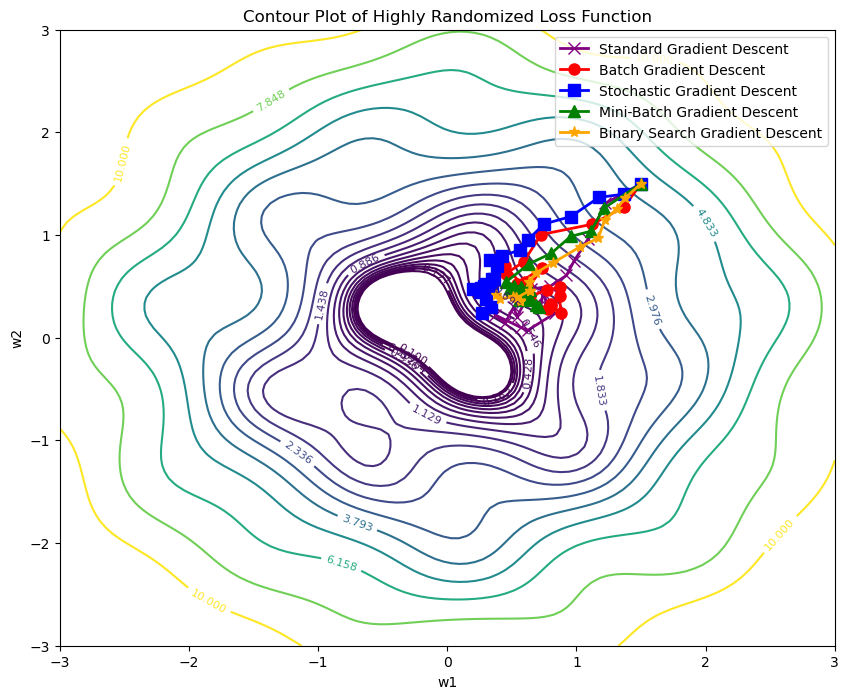

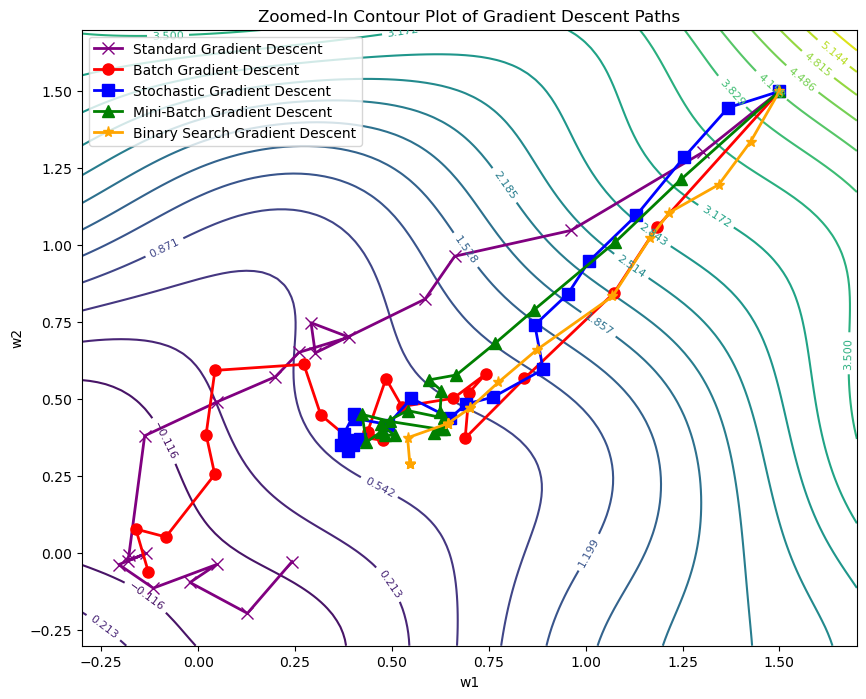

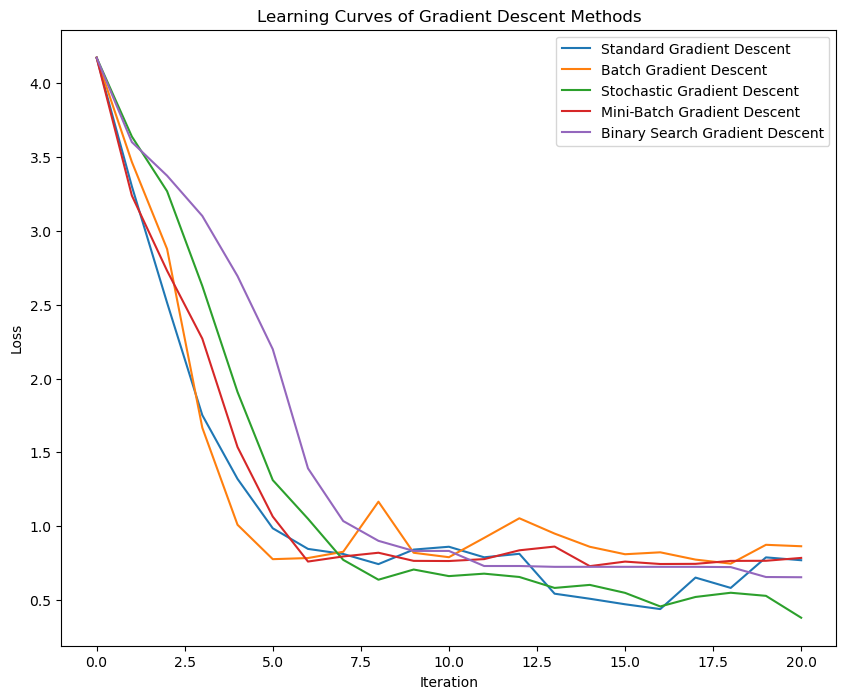

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def main(w1_vals, w2_vals, params, w_init, learning_rate):
    """
    Main function to execute gradient descent visualization and learning curve plotting.

    Parameters:
    - w1_vals, w2_vals: Arrays defining the range for the contour plot grid.
    - params: Dictionary containing configuration for the loss function, gradient, and plotting parameters.
    - w_init: Initial point for starting the gradient descent.
    - learning_rate: Learning rate for the gradient descent methods.
    
    Returns:
    - None
    """
    # Generate the loss function values over the grid
    W1, W2 = np.meshgrid(w1_vals, w2_vals)
    Z = loss_function(W1, W2, params)
    
    # Plot the contour map
    plot_contour(W1, W2, Z, params)
    
    # Dictionary to store losses for each method
    losses_dict = {}

    # Plot paths for different gradient descent methods and collect learning curves
    losses_dict['Standard Gradient Descent'] = plot_descent_path(standard_gradient_descent, w_init, color='purple', marker='x', label='Standard Gradient Descent', learning_rate=learning_rate, params=params, return_losses=True)
    losses_dict['Batch Gradient Descent'] = plot_descent_path(batch_gradient_descent, w_init, color='red', marker='o', label='Batch Gradient Descent', learning_rate=learning_rate, params=params, return_losses=True)
    losses_dict['Stochastic Gradient Descent'] = plot_descent_path(stochastic_gradient_descent, w_init, color='blue', marker='s', label='Stochastic Gradient Descent', learning_rate=learning_rate, params=params, return_losses=True)
    losses_dict['Mini-Batch Gradient Descent'] = plot_descent_path(mini_batch_gradient_descent, w_init, color='green', marker='^', label='Mini-Batch Gradient Descent', learning_rate=learning_rate, params=params, return_losses=True)
    losses_dict['Binary Search Gradient Descent'] = plot_descent_path(binary_search_gradient_descent, w_init, color='orange', marker='*', label='Binary Search Gradient Descent', learning_rate=learning_rate, params=params, return_losses=True)
    
    # Finalize and display the main plot
    plt.legend()
    plt.grid(False)
    plt.show()

    # Create a zoomed-in plot to focus on the paths of gradient descent methods
    zoom_w1_vals = np.linspace(-0.3, 1.7, 100)  # Expanded range
    zoom_w2_vals = np.linspace(-0.3, 1.7, 100)  # Expanded range
    ZoomW1, ZoomW2 = np.meshgrid(zoom_w1_vals, zoom_w2_vals)
    ZoomZ = loss_function(ZoomW1, ZoomW2, params)

    plt.figure(figsize=params['figsize'])
    # Adjust levels based on ZoomZ to ensure contours are fully visible
    zoom_contours = plt.contour(ZoomW1, ZoomW2, ZoomZ, levels=np.linspace(ZoomZ.min(), ZoomZ.max(), params['contour_levels']), cmap='viridis')
    plt.clabel(zoom_contours, inline=True, fontsize=params['label_fontsize'])
    plt.title('Zoomed-In Contour Plot of Gradient Descent Paths')
    plt.xlabel('w1')
    plt.ylabel('w2')

    # Plot zoomed paths
    plot_descent_path(standard_gradient_descent, w_init, color='purple', marker='x', label='Standard Gradient Descent', learning_rate=learning_rate, params=params)
    plot_descent_path(batch_gradient_descent, w_init, color='red', marker='o', label='Batch Gradient Descent', learning_rate=learning_rate, params=params)
    plot_descent_path(stochastic_gradient_descent, w_init, color='blue', marker='s', label='Stochastic Gradient Descent', learning_rate=learning_rate, params=params)
    plot_descent_path(mini_batch_gradient_descent, w_init, color='green', marker='^', label='Mini-Batch Gradient Descent', learning_rate=learning_rate, params=params)
    plot_descent_path(binary_search_gradient_descent, w_init, color='orange', marker='*', label='Binary Search Gradient Descent', learning_rate=learning_rate, params=params)

    # Finalize and display the zoomed-in plot
    plt.legend()
    plt.grid(False)
    plt.show()

    # Plot the learning curves for all methods
    plot_learning_curves(losses_dict, params)


if __name__ == "__main__":
    # Set parameters and grid values outside of main
    params = {
        'sine_coeff_1': np.random.uniform(0.1, 0.5),      # Amplitude of the first sine component
        'sine_coeff_2': np.random.uniform(0.1, 0.5),      # Amplitude of the second sine component
        'sine_freq_1': np.random.uniform(1, 5),           # Frequency of the first sine component
        'sine_freq_2': np.random.uniform(1, 5),           # Frequency of the second sine component
        'sine_phase_1': np.random.uniform(-np.pi, np.pi), # Phase shift for the first sine in the first direction (w1)
        'sine_phase_2': np.random.uniform(-np.pi, np.pi), # Phase shift for the first sine in the second direction (w2)
        'sine_phase_3': np.random.uniform(-np.pi, np.pi), # Phase shift for the second sine in the first direction (w1)
        'sine_phase_4': np.random.uniform(-np.pi, np.pi), # Phase shift for the second sine in the second direction (w2)
        'exp_coeff': np.random.uniform(0.05, 0.3),        # Coefficient for the exponential component
        'exp_shift_w1': np.random.uniform(-2, 2),         # Shift for the center of the exponential in the first direction (w1)
        'exp_shift_w2': np.random.uniform(-2, 2),         # Shift for the center of the exponential in the second direction (w2)
        'exp_spread': np.random.uniform(0.5, 2),          # Spread (variance) of the exponential component
        'random_scale': np.random.uniform(0.5, 2),        # Scaling factor for the combined random components
        'noise_scale': 1.0,                               # Standard deviation for the noise added to the gradient
        'figsize': (10, 8),                               # Size of the figure for plotting
        'contour_levels': 20,                             # Number of contour levels in the plot
        'label_fontsize': 8,                              # Font size for contour labels
        'marker_size': 8,                                 # Size of the markers in the gradient descent path
        'steps': 20                                       # Number of steps to simulate in the gradient descent
    }
    
    # Grid parameters for the contour plot
    w1_vals = np.linspace(-3, 3, 100)
    w2_vals = np.linspace(-3, 3, 100)
    
    # Initial point and learning rate
    w_init = np.array([1.5, 1.5])
    learning_rate = 0.1
    
    # Call the main function with parameters
    main(w1_vals, w2_vals, params, w_init, learning_rate)
